**The purpose of this notebook is to explore hyperparameter optimization of the RandomForestClassifier used in our machine learning pipeline.**

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy.stats
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble
import sklearn.feature_selection
import unittest

import sklearn.datasets
import sklearn.tree

In [5]:
df = pd.read_csv("../pairpro/tests/sample_df.csv")

In [7]:
df.columns

Index(['thermo_pid', 'meso_pid', 'local_gap_compressed_percent_id',
       'scaled_local_query_percent_id', 'scaled_local_symmetric_percent_id',
       'local_E_value', 'query_align_start', 'query_align_end',
       'subject_align_end', 'subject_align_start', 'query_align_len',
       'query_align_cov', 'subject_align_len', 'subject_align_cov',
       'bit_score', 'thermo_taxid', 'meso_taxid', 'm_ogt', 't_ogt',
       'ogt_difference', 'm_protein_seq', 't_protein_seq', 'meso_pdb',
       'thermo_pdb', 'pair_id', 'hmmer_match', 'structure_match'],
      dtype='object')

Import n=50,000 sample dataset.

In [2]:
cd /Users/loganroberts/Learn2Therm/ValidProt/notebooks

/Users/loganroberts/Learn2Therm/ValidProt/notebooks


In [3]:
df = pd.read_csv('learn2therm_sample_50k_exploration.csv')

In [4]:
target = pd.read_csv('protein_match_50k')
target=target.drop(columns=['Unnamed: 0'])

In [5]:
target['protein_match'] = target['protein_match'].map({'Yes': 1, 'No': 0})
target

,prot_pair_index,protein_match,Jaccard_Score
0,48641291,1,1.00
1,92992745,1,1.00
2,157628663,1,1.00
3,136708305,1,1.00
4,133672542,1,1.00
...,...,...,...
48845,78849058,0,0.25
48846,108797464,1,1.00
48847,161110219,0,0.25
48848,74177185,1,0.50


In [6]:
from sklearn.utils import resample

# Assuming your data is in a pandas DataFrame called 'data'
# Separate the majority and minority classes
majority_class = target[target['protein_match'] == 1]
minority_class = target[target['protein_match'] == 0]

# Undersample the majority class to match the number of minority class samples
n_samples = len(minority_class)
undersampled_majority = resample(majority_class, n_samples=n_samples, replace=False)

# Combine the undersampled majority class with the minority class
balanced_data = pd.concat([undersampled_majority, minority_class])

In [7]:
df = pd.merge(df, balanced_data, on=['prot_pair_index'])
df

,Unnamed: 0,local_gap_compressed_percent_id,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,query_align_len,query_align_cov,subject_align_len,subject_align_cov,bit_score,thermo_index,...,t_ogt,ogt_difference,m_protein_seq,t_protein_seq,m_protein_desc,t_protein_desc,m_protein_len,t_protein_len,protein_match,Jaccard_Score
0,2,0.279621,0.234127,0.218924,211,0.837302,210,0.731707,96,875,...,50.0,22.0,MKDTVVFVTGAARGIGAHTARLAVARGARVALVGLEPHLLADLAAE...,MTPEQIFSGQTAIVTGGASGIGAATVEHIARRGGRVFSVDLSYDSP...,SDR family oxidoreductase,SDR family oxidoreductase,287,252,1,1.00
1,4,0.338710,0.318182,0.287671,60,0.909091,71,0.887500,61,9827,...,50.0,20.0,MIISLRRGLRFIRFIVFFAALVYLFYHVLDLFNGWISPVDQYQMPT...,MKRMVWRTLKVFIIFIACTLLFYFGLRFMHLEYEQFHRYEPPEGPA...,YqzK family protein,YqzK family protein,80,66,1,1.00
2,5,0.333333,0.267380,0.254453,148,0.791444,163,0.791262,127,8919,...,42.0,24.5,MVTTGERQRNARGEGARLRLEIVAATQALLADGETATLRSIARRAG...,MNRPTYHHGDLRAAILTEAARLVAERGAERVSLRELAREAGVSHAA...,TetR/AcrR family transcriptional regulator,TetR/AcrR family transcriptional regulator,206,187,1,1.00
3,8,0.265306,0.201550,0.210243,320,0.826873,294,0.828169,140,1674,...,57.5,27.5,MSITTKEKRFGIIERYREFLPVTENTPKLTLHEGDTPLIHAASLSA...,MSGVEIEKGYFGQFGGSFVFPELQEVLDYLAEQFERYKDDPEFKQE...,threonine synthase,tryptophan synthase subunit beta,355,387,1,1.00
4,9,0.333333,0.295082,0.291498,218,0.893443,221,0.884000,158,875,...,50.0,24.0,MQIKDSVAVVTGGASGLGLATTKRLLDAGGSVVVIDLKGEDVVAEL...,MTGTVVITGGSRGIGAATAVLAAERGWQVAVSFRERRDAAEQVVRR...,3-hydroxyacyl-CoA dehydrogenase,SDR family oxidoreductase,250,244,1,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,49990,0.251397,0.140187,0.134529,186,0.579439,181,0.520115,117,7134,...,52.5,24.5,MTTQFPLPEIGAETFGDITEDADGNPLSHAQVIRNVITEGQQAEAS...,MTPRFGVFVPQGWRMDLVEIADPIEQYEAMTAVAKAADAGPWDSIW...,LLM class flavin-dependent oxidoreductase,LLM class F420-dependent oxidoreductase,348,321,1,1.00
17104,49993,0.304878,0.188679,0.163666,166,0.626415,170,0.491329,125,875,...,50.0,22.0,MQVGDATVVITGASSGIGRATALAFADAGANLVLTARAKNPLRAAE...,MGRLSGKRAVVTGGATLIGQAVVRTLHREGARVAIADIDEAGAKAV...,SDR family oxidoreductase,SDR family oxidoreductase,346,265,1,0.60
17105,49995,0.344828,0.169972,0.192308,180,0.509915,200,0.738007,53,14963,...,52.5,24.5,MDNATFRLGDDLSVRLPGHSRWIGQVEREQRWLPWLAPRLPLTVST...,MPPQPRPLRPNDPREIGGFALLGRLGEGGQGTVYLGGAPDGRRVAV...,aminoglycoside phosphotransferase family protein,serine/threonine protein kinase,271,353,0,0.25
17106,49997,0.352174,0.239645,0.242152,230,0.680473,227,0.685801,279,7134,...,52.5,24.5,MIRLAELTKTYPGQQHPAVDGISMEVAEGEIVVLVGPSGCGKTTTL...,MTEQPILSARGLTVDFRLRGGRRARAVDGVDLDLAPGEVLALAGES...,ABC transporter ATP-binding protein,ABC transporter ATP-binding protein,331,338,0,0.25


In [8]:
#get rid of stuff that isn't quantitative
df = df.drop(columns = ['meso_index', 'meso_protein_int_index', 'local_gap_compressed_percent_id_16s', 
                        'scaled_local_query_percent_id_16s', 'scaled_local_symmetric_percent_id_16s',
                       'bit_score_16s', 'm_ogt', 't_ogt', 'taxa_pair_index', 'thermo_protein_int_index'
                       , 'prot_pair_index', 'ogt_difference', 'Jaccard_Score',
                       'query_align_cov_16s', 'subject_align_cov_16s',
                       'Unnamed: 0', 'thermo_index','m_protein_seq', 't_protein_seq', 
                       'm_protein_desc', 't_protein_desc'])

In [9]:
df.head()

,local_gap_compressed_percent_id,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,query_align_len,query_align_cov,subject_align_len,subject_align_cov,bit_score,m_protein_len,t_protein_len,protein_match
0,0.279621,0.234127,0.218924,211,0.837302,210,0.731707,96,287,252,1
1,0.338710,0.318182,0.287671,60,0.909091,71,0.887500,61,80,66,1
2,0.333333,0.267380,0.254453,148,0.791444,163,0.791262,127,206,187,1
3,0.265306,0.201550,0.210243,320,0.826873,294,0.828169,140,355,387,1
4,0.333333,0.295082,0.291498,218,0.893443,221,0.884000,158,250,244,1


Split dev and test data:

In [10]:
#choosing 80/20 split instead of 85/15 because of volume of data

dev, test = sklearn.model_selection.train_test_split(df, test_size=0.15, random_state=1)

#might want to name the above split train/val, since we don't really have "test data" yet
train, val = sklearn.model_selection.train_test_split(dev, test_size=0.15, random_state=1)

print(dev.shape)
print(test.shape)
print(train.shape)
print(val.shape)

(14541, 11)
(2567, 11)
(12359, 11)
(2182, 11)


In [11]:
target = 'protein_match'
input_features = [columns for columns in df]
input_features.remove(target)

In [12]:
print(input_features)
print(target)

['local_gap_compressed_percent_id', 'scaled_local_query_percent_id', 'scaled_local_symmetric_percent_id', 'query_align_len', 'query_align_cov', 'subject_align_len', 'subject_align_cov', 'bit_score', 'm_protein_len', 't_protein_len']
protein_match


In [13]:
# predicting values 

dev_X = dev[input_features].values
test_X = test[input_features].values

dev_y = dev[target].values.reshape(-1,1)
test_y = test[target].values.reshape(-1,1)  

print(dev_X.shape, test_X.shape, dev_y.shape, test_y.shape)

(14541, 10) (2567, 10) (14541, 1) (2567, 1)


In [14]:
train_X = train[input_features].values
val_X = val[input_features].values

train_y = train[target].values.reshape(-1,1)
val_y = val[target].values.reshape(-1,1) 

Scale the data

In [15]:
scaler = sklearn.preprocessing.StandardScaler()
dev_X = scaler.fit_transform(dev_X)
test_X = scaler.fit_transform(test_X)
train_X = scaler.fit_transform(train_X)
val_X = scaler.fit_transform(val_X)

Train the model

In [16]:
#Random Forest
#hyperparameters determined from optimization below

model = sklearn.ensemble.RandomForestClassifier(n_estimators=150, max_depth=None, max_samples=0.5,
                                                max_features=0.5, min_weight_fraction_leaf=0.000215,
                                               min_samples_split=10)
model.fit(dev_X, dev_y.ravel())

RandomForestClassifier(max_features=0.5, max_samples=0.5, min_samples_split=10,
                       min_weight_fraction_leaf=0.000215, n_estimators=150)

Test the model, report relevant statistics

In [17]:
score = model.score(test_X, test_y)
print('Model score is: {}'.format(score))

preds = model.predict(test_X)
print(preds)

Model score is: 0.7576938059992209
[0 1 0 ... 0 1 0]


In the cell below, try bagging to improve accuracy of the model.

In [18]:
#try bagging

from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(sklearn.ensemble.RandomForestClassifier(n_estimators=200, max_depth=None, min_weight_fraction_leaf=0.000215),
                             max_samples=0.5, max_features=0.5)

In [19]:
bagging.fit(dev_X, dev_y.ravel())

BaggingClassifier(estimator=RandomForestClassifier(min_weight_fraction_leaf=0.000215,
                                                   n_estimators=200),
                  max_features=0.5, max_samples=0.5)

In [20]:
bagging.score(test_X, test_y)

0.7588624853915076

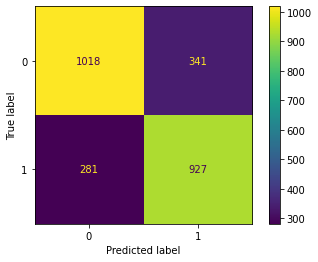

In [21]:
#confusion matrix

confusion_matrix = sklearn.metrics.confusion_matrix(preds, test_y)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

Try Random Search to optimize hyperparameters

In [22]:
# create hyperparameter value options for each hyperparameter
max_depth_options = [1,2,3,4,5]
min_weight_fraction_options = [0, 0.1, 0.2, 0.3, 0.4]
max_sample_options = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
min_samples_split_options = [i for i in range(20)]

In [23]:
# Define the grid of hyperparameter options

param_grid = {
    'max_depth': max_depth_options,
    'min_weight_fraction_leaf': min_weight_fraction_options,
    'n_estimators': [i for i in range(0,300,10)],
#     'n_estimators': [0,25,50,75,100,125,150,175,200,225,250,275,300],
    'min_samples_split': min_samples_split_options,
    'max_samples': max_sample_options
}

# Create the grid search object
# Give it the model we want to use, the hyperparameters to search over
#CV parameter executes k-fold cross validation

random_search = sklearn.model_selection.RandomizedSearchCV(
    sklearn.ensemble.RandomForestClassifier(),
    param_grid,
    cv=5
)
# execute the grid search
random_search.fit(dev_X, dev_y.ravel())

print('Best hyperparameters: ', random_search.best_params_)

Best hyperparameters:  {'n_estimators': 200, 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 2, 'max_samples': 0.2, 'max_depth': 3}


In [24]:
model = sklearn.ensemble.RandomForestClassifier(n_estimators=190, max_depth=None, min_weight_fraction_leaf=0,
                             max_samples=0.3, max_features=0.5, min_samples_split=11)
model.fit(dev_X, dev_y.ravel())
print(model.score(test_X, test_y))

0.7658745617452279


Optimize hyperparameters with Optuna

In [25]:
def train_evaluate_hyperparameters(max_depth, min_weight_fraction_leaf, n_estimators):
    
    # create RF classifier model
    model = sklearn.ensemble.RandomForestClassifier(max_depth=max_depth, min_weight_fraction_leaf=min_weight_fraction_leaf,
                                               n_estimators=n_estimators)
    
    # train the model on the training set
    fit = model.fit(train_X, train_y)
    
    # evaluate the model on the validation set
    score = model.score(val_X, val_y)
    
    return score

In [26]:
def id_best_hyperparams(trial):
    # define hyperparameter space
    max_depth_options = trial.suggest_int('max_depth_options', 1, 5)
    min_weight_fraction_options = trial.suggest_uniform("min_weight_fraction_options", 0,0.4)
    n_estimator_options = trial.suggest_int('n_estimators', 50, 200, 50)
    
    # get the score for the hyperparameters chosen
    score = train_evaluate_hyperparameters(max_depth=max_depth_options, min_weight_fraction_leaf=min_weight_fraction_options,
                                          n_estimators=n_estimator_options)
    
    return score

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(id_best_hyperparams, n_trials=50)
print('Best params: ', study.best_params)

[I 2023-06-05 21:10:55,819] A new study created in memory with name: no-name-a63bd4a4-24c4-4240-828d-724b376b61e1
<ipython-input-26-4902f5686a9d>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  min_weight_fraction_options = trial.suggest_uniform("min_weight_fraction_options", 0,0.4)
<ipython-input-25-658ba96c454f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(train_X, train_y)
[I 2023-06-05 21:10:56,914] Trial 0 finished with value: 0.653070577451879 and parameters: {'max_depth_options': 1, 'min_weight_fraction_options': 0.3518525717661354, 'n_estimators': 200}. Best is trial 0 with value: 0.653070577451879.
<ipython-input-26-4902f5686a9d>:4: FutureWarning: suggest_uniform has been depreca

<ipython-input-26-4902f5686a9d>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  min_weight_fraction_options = trial.suggest_uniform("min_weight_fraction_options", 0,0.4)
<ipython-input-25-658ba96c454f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(train_X, train_y)
[I 2023-06-05 21:11:04,622] Trial 10 finished with value: 0.73006416131989 and parameters: {'max_depth_options': 5, 'min_weight_fraction_options': 0.000875002107825899, 'n_estimators': 50}. Best is trial 10 with value: 0.73006416131989.
<ipython-input-26-4902f5686a9d>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

<ipython-input-26-4902f5686a9d>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  min_weight_fraction_options = trial.suggest_uniform("min_weight_fraction_options", 0,0.4)
<ipython-input-25-658ba96c454f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(train_X, train_y)
[I 2023-06-05 21:11:12,103] Trial 20 finished with value: 0.7231897341888176 and parameters: {'max_depth_options': 5, 'min_weight_fraction_options': 0.00020003973274264981, 'n_estimators': 50}. Best is trial 13 with value: 0.7341888175985335.
<ipython-input-26-4902f5686a9d>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

<ipython-input-26-4902f5686a9d>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  min_weight_fraction_options = trial.suggest_uniform("min_weight_fraction_options", 0,0.4)
<ipython-input-25-658ba96c454f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(train_X, train_y)
[I 2023-06-05 21:11:19,102] Trial 30 finished with value: 0.6819431714023831 and parameters: {'max_depth_options': 4, 'min_weight_fraction_options': 0.1410793964347576, 'n_estimators': 200}. Best is trial 13 with value: 0.7341888175985335.
<ipython-input-26-4902f5686a9d>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

<ipython-input-26-4902f5686a9d>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  min_weight_fraction_options = trial.suggest_uniform("min_weight_fraction_options", 0,0.4)
<ipython-input-25-658ba96c454f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit = model.fit(train_X, train_y)
[I 2023-06-05 21:11:26,680] Trial 40 finished with value: 0.6782768102658112 and parameters: {'max_depth_options': 3, 'min_weight_fraction_options': 0.05739861949809677, 'n_estimators': 50}. Best is trial 13 with value: 0.7341888175985335.
<ipython-input-26-4902f5686a9d>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

Best params:  {'max_depth_options': 5, 'min_weight_fraction_options': 0.0008835291691853975, 'n_estimators': 50}
